In [73]:
import numpy as np
import mglearn
np.random.seed(0)
import matplotlib.pyplot as plt
%matplotlib inline

## Linear SVM Revisited

In [74]:
from sklearn import svm

# Linearly separable data
X = np.r_[np.random.randn(20, 2) - [2, 2], np.random.randn(20, 2) + [2, 2]]
Y = [0] * 20 + [1] * 20

# Fit the model
clf = svm.SVC(kernel='linear')
clf.fit(X, Y)

# Get the support vectors and weights
print("Support vectors:")
print(clf.support_vectors_[:])
print("Coefficients:")
print(clf.dual_coef_[:])

Support vectors:
[[-1.02126202  0.2408932 ]
 [-0.46722079 -0.53064123]
 [ 0.95144703  0.57998206]]
Coefficients:
[[-0.04825885 -0.56891844  0.61717729]]


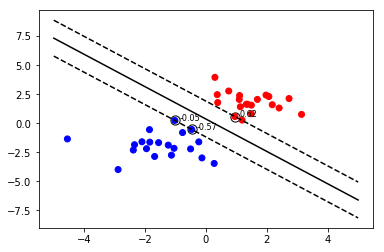

In [75]:
mglearn.plots.plot_svm_linear()

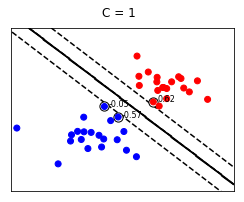

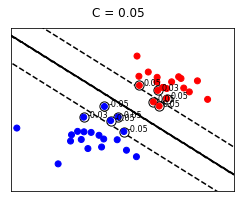

In [76]:
mglearn.plots.plot_svm_margins()

### Kernel SVM

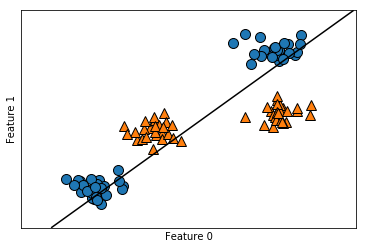

In [77]:
from sklearn.svm import LinearSVC
from sklearn.datasets import make_blobs

X, y = make_blobs(centers=4, random_state=8)
y = y % 2
linear_svm = LinearSVC().fit(X, y)

mglearn.plots.plot_2d_separator(linear_svm, X)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1");

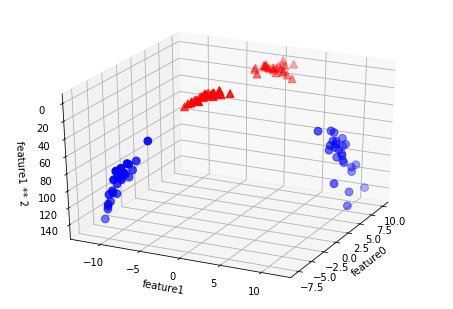

In [78]:
# add the squared first feature
X_new = np.hstack([X, X[:, 1:] ** 2])


from mpl_toolkits.mplot3d import Axes3D, axes3d
figure = plt.figure()
# visualize in 3D
ax = Axes3D(figure, elev=-152, azim=-26)
# plot first all the points with y==0, then all with y == 1
mask = y == 0
ax.scatter(X_new[mask, 0], X_new[mask, 1], X_new[mask, 2], c='b',
           cmap=mglearn.cm2, s=60)
ax.scatter(X_new[~mask, 0], X_new[~mask, 1], X_new[~mask, 2], c='r', marker='^',
           cmap=mglearn.cm2, s=60)
ax.set_xlabel("feature0")
ax.set_ylabel("feature1")
ax.set_zlabel("feature1 ** 2");

Now we can fit a linear model

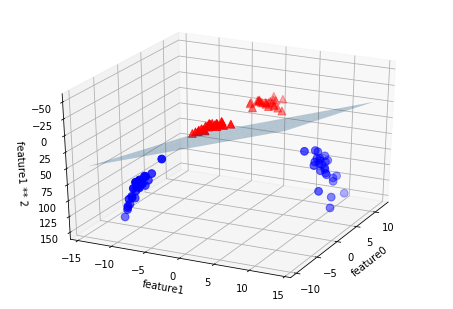

In [79]:
linear_svm_3d = LinearSVC().fit(X_new, y)
coef, intercept = linear_svm_3d.coef_.ravel(), linear_svm_3d.intercept_

# show linear decision boundary
figure = plt.figure()
ax = Axes3D(figure, elev=-152, azim=-26)
xx = np.linspace(X_new[:, 0].min() - 2, X_new[:, 0].max() + 2, 50)
yy = np.linspace(X_new[:, 1].min() - 2, X_new[:, 1].max() + 2, 50)

XX, YY = np.meshgrid(xx, yy)
ZZ = (coef[0] * XX + coef[1] * YY + intercept) / -coef[2]
ax.plot_surface(XX, YY, ZZ, rstride=8, cstride=8, alpha=0.3)
ax.scatter(X_new[mask, 0], X_new[mask, 1], X_new[mask, 2], c='b',
           cmap=mglearn.cm2, s=60)
ax.scatter(X_new[~mask, 0], X_new[~mask, 1], X_new[~mask, 2], c='r', marker='^',
           cmap=mglearn.cm2, s=60)

ax.set_xlabel("feature0")
ax.set_ylabel("feature1")
ax.set_zlabel("feature1 ** 2")

As a function of the original features, the linear SVM model is not actually linear anymore, but more of an ellipse

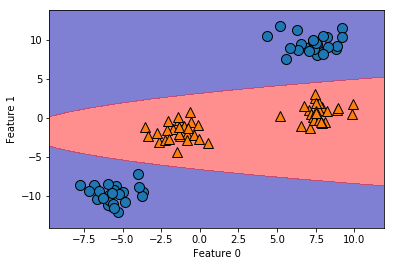

In [80]:
ZZ = YY ** 2
dec = linear_svm_3d.decision_function(np.c_[XX.ravel(), YY.ravel(), ZZ.ravel()])
plt.contourf(XX, YY, dec.reshape(XX.shape), levels=[dec.min(), 0, dec.max()],
             cmap=mglearn.cm2, alpha=0.5)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1");

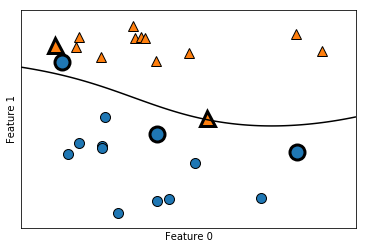

In [81]:
from sklearn.svm import SVC

X, y = mglearn.tools.make_handcrafted_dataset()                                                                  
svm = SVC(kernel='rbf', C=10, gamma=0.1).fit(X, y)                                                
mglearn.plots.plot_2d_separator(svm, X, eps=.5)
# plot data
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
# plot support vectors
sv = svm.support_vectors_
# class labels of support vectors are given by the sign of the dual coefficients
sv_labels = svm.dual_coef_.ravel() > 0
mglearn.discrete_scatter(sv[:, 0], sv[:, 1], sv_labels, s=15, markeredgewidth=3)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1");

### Tuning SVM parameters
Several important parameters:

* gamma (kernel width): high values means that points are further apart
    * Leads to many support vectors, narrow Gaussians, overfitting
    * Low values lead to underfitting
* C (our linear regularizer): limits the weights of the support vectors
    * Higher values: more regularization, less overfitting
* For polynomial kernels, the _degree_ (exponent) defines the complexity of the models

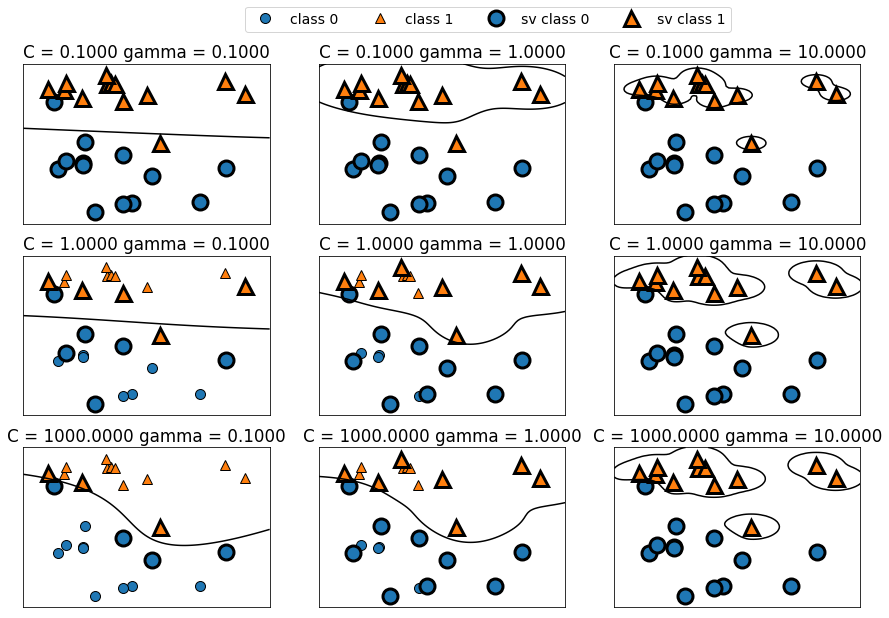

In [124]:
plt.rcParams.update({'font.size': 14})
fig, axes = plt.subplots(3, 3, figsize=(15, 10))

for ax, C in zip(axes, [-1, 0, 3]):
    for a, gamma in zip(ax, range(-1, 2)):
        mglearn.plots.plot_svm(log_C=C, log_gamma=gamma, ax=a)
        
axes[0, 0].legend(["class 0", "class 1", "sv class 0", "sv class 1"],
                  ncol=4, loc=(.9, 1.2));

* Low gamma (left): wide Gaussians, very smooth decision boundaries
* High gamma (right): narrow Gaussians, boundaries focus on single points (high complexity)
* Low C (top): each support vector has very limited influence: many support vectores, almost linear decision boundary
* High C (bottom): Stronger influence, decision boundary bends to every support vector

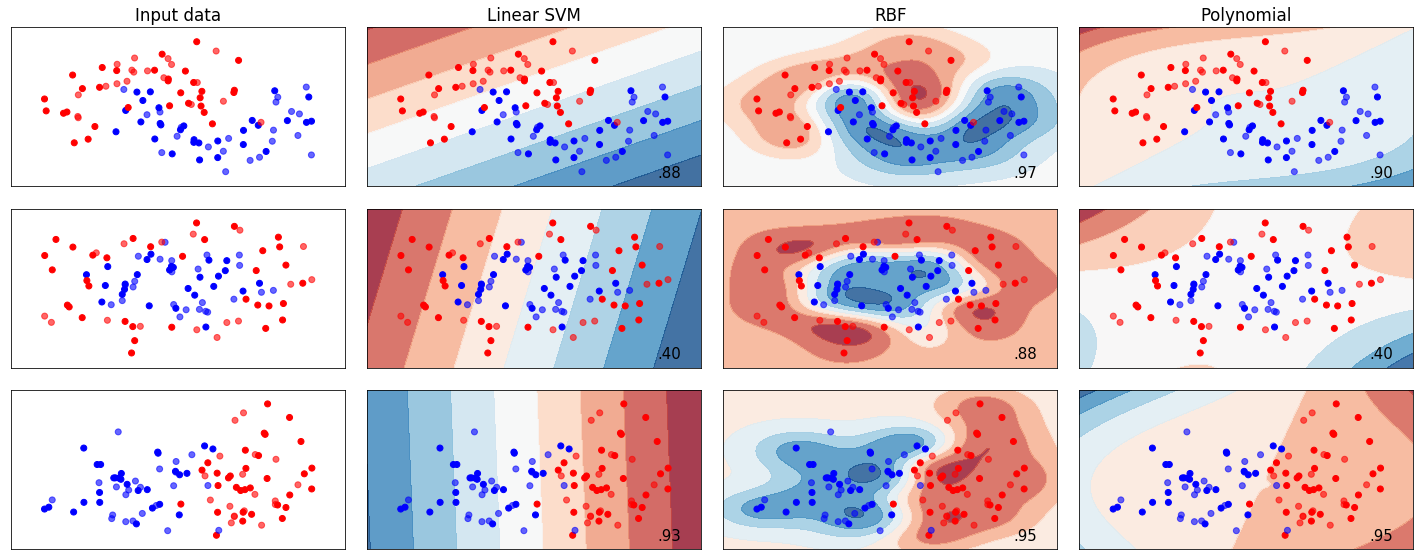

In [84]:
import plot_classifiers as pc
names = ["Linear SVM", "RBF", "Polynomial"]

classifiers = [
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
    SVC(kernel="poly", degree=3, C=0.1)
    ]

pc.plot_classifiers(names, classifiers, figuresize=(20,8))

### Preprocessing Data for SVMs
* SVMs are very sensitive to hyperparameter settings
* They expect all features to be approximately on the same scale
    * If not, they overfit easily

In [85]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, random_state=0)

svc = SVC()
svc.fit(X_train, y_train)

print("Accuracy on training set: {:.2f}".format(svc.score(X_train, y_train)))
print("Accuracy on test set: {:.2f}".format(svc.score(X_test, y_test)))

Accuracy on training set: 1.00
Accuracy on test set: 0.63


We can plot the scales of the features by plotting their min and max value

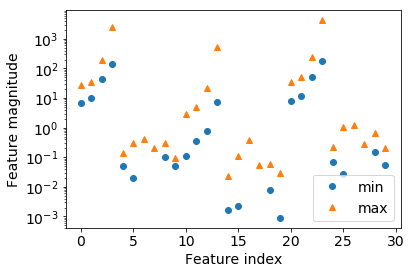

In [86]:
plt.plot(X_train.min(axis=0), 'o', label="min")
plt.plot(X_train.max(axis=0), '^', label="max")
plt.legend(loc=4)
plt.xlabel("Feature index")
plt.ylabel("Feature magnitude")
plt.yscale("log")

 We can scale all features between 0 and 1    
Note: the sklearn.prepr  ocessing package supports many preprocessing techniques, including the `MinMaxScaler`  

In [87]:
 # Compute the minimum value per feature on the training set
min_on_training = X_train.min(axis=0)  
# Compute the range of each feature (max - min) on the training set
range_on_training = (X_train - min_on_training).max(axis=0)

# subtract the min, divide by range
# afterwards min=0 and max=1 for each feature
X_train_scaled = (X_train - min_on_training) / range_on_training
print("Minimum for each feature\n{}".format(X_train_scaled.min(axis=0)))
print("Maximum for each feature\n {}".format(X_train_scaled.max(axis=0)))

Minimum for each feature
[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
Maximum for each feature
 [ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.]


* We must now apply the SAME transformation on the test set
    * Don't rescale the test set separately
    * Don't apply rescaling before making train test spits
* sklearn offers `pipelines` which make this easier
    * Wrapper around series of operators

In [88]:
# use THE SAME transformation on the test set,
# using min and range of the training set.
X_test_scaled = (X_test - min_on_training) / range_on_training

In [89]:
svc = SVC()
svc.fit(X_train_scaled, y_train)

print("Accuracy on training set: {:.3f}".format(
        svc.score(X_train_scaled, y_train)))
print("Accuracy on test set: {:.3f}".format(svc.score(X_test_scaled, y_test)))

Accuracy on training set: 0.948
Accuracy on test set: 0.951


In [90]:
svc = SVC(C=1000)
svc.fit(X_train_scaled, y_train)

print("Accuracy on training set: {:.3f}".format(
        svc.score(X_train_scaled, y_train)))
print("Accuracy on test set: {:.3f}".format(svc.score(X_test_scaled, y_test)))

Accuracy on training set: 0.988
Accuracy on test set: 0.972


### Strengths, weaknesses and parameters

* SVMs allow complex decision boundaries, even with few features. 
* Work well on both low- and high-dimensional data

* Don't scale very well to large datasets (>100000)
* Require careful preprocessing of the data and tuning of the parameters. 
* SVM models are hard to inspect

Important parameters:
* regularization parameter _C_
* choice of the kernel and kernel-specific parameters
    * Typically string correlation with _C_